# Single Qubit Gates

In __The Atoms of Computation__ we came across some gates and used them to perform a classical computation. An important feature of quantum circuits is that, between initialising the qubits and measuring them, the operations (gates) are always reversible. These reversible gates can be represented as matrices, and as rotations around the Bloch sphere.

In [1]:
from qiskit import QuantumCircuit, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from math import pi, sqrt

sim = Aer.get_backend('aer_simulator')

## 1. The Pauli Gates

### 1.1 The $X$-Gate 

The $X$-gate is represented by the Pauli-$X$ matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

To see the effect a gate has on a qubit, we simply multiply the qubit’s statevector by the gate. We can see that the $X$-gate switches the amplitudes of the states $|0\rangle$ and $|1\rangle$:

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle $$

In Qiskit, we can create a short circuit to verify this:

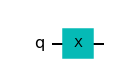

In [2]:
qc = QuantumCircuit(1)

qc.x(0)
qc.draw(output="mpl")

Let's see the result of the above circuit. Note: Here we use `plot_bloch_multivector()` which takes a qubit's statevector instead of the Bloch vector.

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


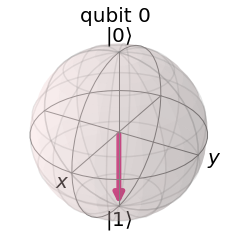

In [3]:
qc.save_statevector()

state = sim.run(qc).result().get_statevector()
plot_bloch_multivector(state)

We can indeed see the state of the qubit is $|1\rangle$ as expected. We can think of this as a rotation by $\pi$ radians around the $x$-axis of the Bloch sphere. The $X$-gate is also often called a $NOT$-gate, referring to its classical analogue.

### 1.2 The Y & Z-Gates

Similarly to the $X$-gate, the $Y$ & $Z$ Pauli matrices also act as the $Y$ & $Z$-gates in our quantum circuits:

$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$
$$ Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$

And, unsurprisingly, they also respectively perform rotations by $\pi$ around the $y$ and $z$-axis of the Bloch sphere.

In Qiskit, we can apply the $Y$ and $Z$-gates to our circuit using:

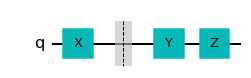

In [4]:
qc.y(0) # do Y-gate on qubit 0
qc.z(0) # do Z-gate on qubit 0

qc.draw(output="mpl")

## 2. Digression: The X, Y & Z-Bases

You may also notice that the $Z$-gate appears to have no effect on our qubit when it is in either of these two states. This is because the states $|0\rangle$ and $|1\rangle$ are the two eigenstates of the $Z$-gate. In fact, the computational basis (the basis formed by the states $|0\rangle$ and $|1\rangle$) is often called the $Z$-basis. This is not the only basis we can use, a popular basis is the $X$-basis, formed by the eigenstates of the $X$-gate. We call these two vectors $|+\rangle$ and $|-\rangle$:

$$ |+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix} $$

$$ |-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix} $$

Their expression can be easily verified by considering that the $X$-gate has eigenvalues $\lambda_{1,2} = \pm 1$, which are associated to eigenstates $\psi$ of the form

$$ \psi_0 = \lambda\psi_1 $$

plugging the eigenvalues into this expression and imposing the normalization constraint results into the $|+\rangle$ and $|-\rangle$ eigenstates we described before.

Another less commonly used basis is that formed by the eigenstates of the $Y$-gate. These are called:

$$ |\circlearrowleft\rangle, \quad |\circlearrowright\rangle $$

and can be calculated by considering that

$$ Y|\psi\rangle = \lambda |\psi\rangle $$

where $Y$, being Hermitian, has real eigenvalues, again equal to $\lambda_{1,2} = \pm 1$, corresponding to the eigenstates expressions of

$$ \lambda \psi_0 = -i \psi_1 $$

which, after normalization, results into the eigenstates:

$$ |\circlearrowleft\rangle = \tfrac{1}{\sqrt{2}} (|0\rangle + i|1\rangle) \quad\quad\quad\quad |\circlearrowright\rangle = \tfrac{1}{\sqrt{2}} (|0\rangle - i|1\rangle)$$ 

We can visualize these states on separate Bloch spheres, with `plot_bloch_multivector()` on the circuit composed of two qubits, initialized in the Z-basis and transformed into the Y-basis:

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


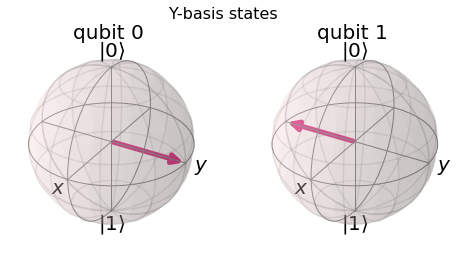

In [5]:
# first, we prepare the qubits' states of the computational basis
qc = QuantumCircuit(2)
qc.x(1)

# then, we rotate each of them the the Y-axis 
for qubit in range(2):
    qc.h(qubit)
    qc.s(qubit)

state = Statevector(qc)
plot_bloch_multivector(state, title="Y-basis states")

There are in fact an infinite number of bases; to form one, we simply need two orthogonal vectors. The eigenvectors of both Hermitian and unitary matrices form a basis for the vector space. Due to this property, we can be sure that the eigenstates of the $X$-gate and the $Y$-gate indeed form a basis for 1-qubit states.

Using only the Pauli-gates it is impossible to move our initialized qubit to any state other than $|0\rangle$ or $|1\rangle$, i.e. we cannot achieve superposition. This means we can see no behaviour different to that of a classical bit. To create more interesting states we will need more gates!

## 3. The Hadamard Gate

The Hadamard gate ($H$-gate) is a fundamental quantum gate. It allows us to move away from the poles of the Bloch sphere and create a superposition of $|0\rangle$ and $|1\rangle$. It has the matrix:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

We can see that this performs the transformations below:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

This can be thought of as a rotation around the Bloch vector $[1, 0, 1]$ (the line between the $x$ & $z$-axis), or as transforming the state of the qubit between the X and Z bases.

In order to write the $H$-gate in terms of the outer product of vectors $|0\rangle$, $|1\rangle$, $|+\rangle$, and $|-\rangle$, we first take into account that

$$ |0\rangle \langle0| = \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}, \quad\quad |1\rangle \langle1| = \begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix}, \quad\quad|0\rangle \langle1| = \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix}, \quad\quad |1\rangle \langle0| = \begin{bmatrix} 0 & 0 \\ 1 & 0 \end{bmatrix} $$

then, we decompose the initial expression of the gate in terms of those four ones:

$$ \begin{aligned}
    H &= \tfrac{1}{\sqrt{2}} \Big(|0\rangle \langle 0| + |0\rangle \langle1| + |1\rangle \langle0| - |1\rangle \langle 1|\Big) \\
    &= \tfrac{1}{\sqrt{2}} \Big( \big(|0\rangle + |1\rangle\big)\langle0| + \big(|0\rangle - |1\rangle\big)\langle 1| \Big) \\
    &= |+\rangle \langle0| + |-\rangle \langle1|
\end{aligned} $$

The $H$-gate can also be used to change from the Z to the X-bases. As an example, applying $HZH$ to a qubit state is equivalent to an $X$-gate, since we are doing an inversion operation in a different basis and then getting back to the original one; this can also be seen explicitly by calculations:

$$ HZH = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = X $$ 

This can be done for any other gate. As an example, the $Y$-gate, is equivalent to the operation $HZXH$:

$$ HZXH = \tfrac{1}{2} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$$

meaning that the two operations are the same, except for a global phase of $i$:

$$ iHZXH = Y $$ 

## 4. Digression: Measuring in Different Bases

We have seen that the Z-basis is not intrinsically special, and that there are infinitely many other bases. Similarly with measurement, we don’t always have to measure in the computational basis, we can measure our qubits in any basis.

As an example, let’s try measuring in the X-basis. We can calculate the probability of measuring either $|+\rangle$ or $|-\rangle$:

$$ p(|+\rangle) = |\langle+|q\rangle|^2, \quad p(|-\rangle) = |\langle-|q\rangle|^2 $$

And after measurement, the superposition is destroyed. Since Qiskit only allows measuring in the Z-basis, we must create our own using Hadamard gates:

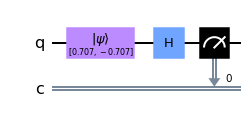

In [6]:
# create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]

qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0

qc.draw(output="mpl")

In the section above, we saw it is possible to create an $X$-gate by sandwiching our $Z$-gate between two $H$-gates:

$$ X = HZH $$

Starting in the Z-basis, the $H$-gate switches our qubit to the X-basis, the $Z$-gate performs a $NOT$ in the X-basis, and the final $H$-gate returns our qubit to the Z-basis. We saw this always behaves like an $X$-gate by multiplying the matrices:

$$ HZH =
\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
=
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
=X $$

Following the same logic, we have created an X-measurement by transforming from the X-basis to the Z-basis before our measurement. Since the process of measuring can have different effects depending on the system (e.g. some systems always return the qubit to $|0\rangle$ after measurement, whereas others may leave it as the measured state), the state of the qubit post-measurement is undefined and we must reset it if we want to use it again.

There is another way to see why the Hadamard gate indeed takes us from the Z-basis to the X-basis. Suppose the qubit we want to measure in the X-basis is in the (normalized) state $a|0\rangle + b|1\rangle$. To measure it in X-basis, we first express the state as a linear combination of $|+\rangle$ and $|-\rangle$. Using the relations $|0\rangle = \frac{|+\rangle + |-\rangle}{\sqrt{2}}$ and $|1\rangle = \frac{|+\rangle - |-\rangle}{\sqrt{2}}$, the state becomes $\frac{a + b}{\sqrt{2}}|+\rangle + \frac{a - b}{\sqrt{2}}|-\rangle$. Observe that the probability amplitudes in X-basis can be obtained by applying a Hadamard matrix on the state vector expressed in Z-basis.

Let’s now see the results:

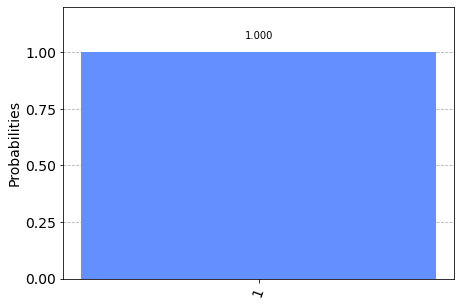

In [7]:
counts = sim.run(qc).result().get_counts()  # do the simulation, returning the state vector
plot_histogram(counts)  # display the output on measurement of state vector

We initialized our qubit in the state $|-\rangle$, but we can see that, after the measurement, we have collapsed our qubit to the state $|1\rangle$. If we run the cell again, we will see the same result, since along the X-basis, the state $|-\rangle$ is a basis state and measuring it along X will always yield the same result.

This also means that if, for example, we initialized a qubit in the state $|+\rangle$, the probability of measuring it in state $|-\rangle$ would be 0, as the two states are the ones that make up the $X$-basis. This is also verified by the fact that 

$$ \begin{aligned}
    p(|-\rangle)_{|+\rangle} &= \Big|\langle-|+\rangle \Big|^2 = \tfrac{1}{2} \Big|\big(\langle0| - \langle1|\big)\big(|0\rangle+|1\rangle\big) \Big|^2 \\
    &= \tfrac{1}{2} \Big| \langle0|0\rangle + \langle0|1\rangle - \langle1|1\rangle - \langle1|1\rangle  \Big|^2 = 0
\end{aligned} $$

On the other hand, the probability of measuring computational states (which is the default measurement basis in Qiskit) when a qubit is in the X-basis state $|+\rangle$ follows the traditional behavior:

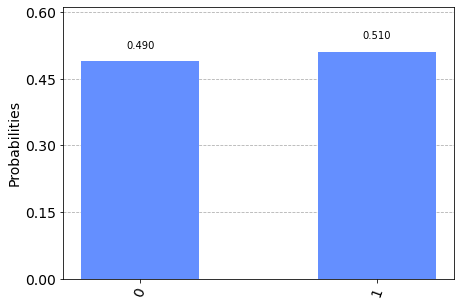

In [8]:
qc = QuantumCircuit(1,1) 

initial_state = [1/sqrt(2), 1/sqrt(2)] # define our initial state as |+> (we could have also used an H-gate)
qc.initialize(initial_state, 0) 

qc.measure(0, 0) # measure qubit 0 and store the results in classical bit 0

counts = sim.run(qc).result().get_counts() 
plot_histogram(counts)

Following the same line of thought, we can also create a function that measures in the Y-basis. Particularly, we want a gate that performs the transformation

$$ \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i \end{bmatrix} \longrightarrow \begin{bmatrix} 1 \\ 0 \end{bmatrix} $$
$$ \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -i \end{bmatrix} \longrightarrow \begin{bmatrix} 0 \\ 1 \end{bmatrix} $$ 

This can be accomplished by either the gate $R_x(\pi/2)$ or the sequence of gates $S^\dagger$ followed by $H$. Next, we measure in the Z-basis and then reverse the transformation: 

$$ \begin{bmatrix} 1 \\ 0 \end{bmatrix} \longrightarrow \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i \end{bmatrix} $$
$$ \begin{bmatrix} 0 \\ 1 \end{bmatrix} \longrightarrow \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i \end{bmatrix} $$

which we can do by using an $R_x(\pi/2)$ or the sequence of $H$ and $S$.

The code below shows a practical example of such considerations:

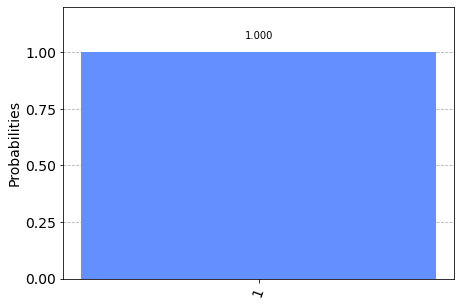

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


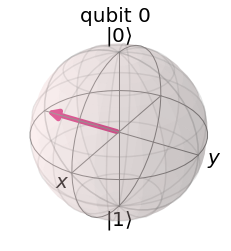

In [9]:
def y_measure(qc, qubit, cbit):
    qc.sdg(qubit)
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    qc.s(qubit)

qc = QuantumCircuit(1,1)

initial_state = [1/sqrt(2), -1j/sqrt(2)] # define our initial state (1 in Y-basis)

qc.initialize(initial_state, 0) 
y_measure(qc, 0, 0)

sv_sim = Aer.get_backend('statevector_simulator')
result = sv_sim.run(qc).result()

display(plot_histogram(result.get_counts()))
plot_bloch_multivector(result.get_statevector())

Measuring in different bases allows us to see Heisenberg’s famous uncertainty principle in action. Having certainty of measuring a state in the Z-basis removes all certainty of measuring a specific state in the X-basis, and vice versa. A common misconception is that the uncertainty is due to the limits in our equipment, but here we can see the uncertainty is actually part of the nature of the qubit.

For example, if we put our qubit in the state $|0\rangle$, our measurement in the Z-basis is certain to be $|0\rangle$, but our measurement in the X-basis is completely random! Similarly, if we put our qubit in the state $|-\rangle$, our measurement in the X-basis is certain to be $|-\rangle$, but now any measurement in the Z-basis will be completely random.

More generally: Whatever state our quantum system is in, there is always a measurement that has a deterministic outcome.

The introduction of the $H$-gate has allowed us to explore some interesting phenomena, but we are still very limited in our quantum operations.

## 5. The $P$-Gate

The $P$-gate (phase gate) is parametrised, that is, it needs a number $\phi$ to tell it exactly what to do. The $P$-gate performs a rotation of $\phi$ around the Z-axis direction. It has the matrix form:

$$ P(\phi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix} $$

Where $\phi$ is a real number.

In Qiskit, we specify a $P$-gate using `p(phi, qubit)`:

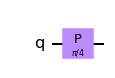

In [15]:
qc = QuantumCircuit(1)
qc.p(pi/4, 0)

qc.draw(output="mpl")

The $Z$-gate is a special case of the $P$-gate, with $\phi = \pi$. In fact, there are three more commonly referenced gates we will mention in this chapter, all of which are special cases of the $P$-gate:

## 6. The $I$, $S$ and $T$-gates 

### 6.1 The $I$-Gate

First comes the $I$-gate (aka ‘Id-gate’ or ‘Identity gate’). This is simply a gate that does nothing. Its matrix is the identity matrix:

$$ I = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix} $$

From this definition, all states are eigenstates of the $I$-gate with eigenvalue 1. Applying the identity gate anywhere in your circuit should have no effect on the qubit state, so it’s interesting this is even considered a gate. 

There are two main reasons behind this, one is that it is often used in calculations, for example, proving the $X$-gate is its own inverse:

$$ I = XX $$ 

The second, is that it is often useful when considering real hardware to specify a ‘do-nothing’ or ‘none’ operation.

### 6.2 The $S$-gates

The next gate to mention is the $S$-gate (sometimes known as the $\sqrt{Z}$-gate), this is a $P$-gate with $\phi = \pi/2$. It does a quarter-turn around the Bloch sphere. It is important to note that unlike every gate introduced in this chapter so far, the $S$-gate is not its own inverse. As a result, we often see the $S^\dagger$-gate, (also “S-dagger”, “Sdg” or √Z†-gate). The $S^\dagger$-gate is clearly an $P$-gate with $\phi = − \pi/2$:

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}, \quad  S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix} $$

The name "$\sqrt{Z}$-gate" is due to the fact that two successively applied $S$-gates has the same effect as one $Z$-gate: 

$$ SS|\psi\rangle = Z|\psi\rangle $$

This notation is common throughout quantum computing.

To add an $S$-gate in Qiskit:

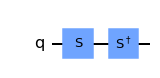

In [16]:
qc = QuantumCircuit(1)
qc.s(0)
qc.sdg(0)

qc.draw(output="mpl")

### 6.3 The $T$-gate

The $T$-gate is a very commonly used gate, it is a $P$-gate with $\phi = \pi/4$: 

$$ T = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}, \quad  T^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{bmatrix} $$

As with the $S$-gate, the $T$-gate is sometimes also known as the $\sqrt[4]{Z}$-gate.

In Qiskit:

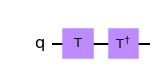

In [17]:
qc = QuantumCircuit(1)
qc.t(0)
qc.tdg(0)

qc.draw(output="mpl")

## 7. The $U$-Gate 

As we saw earlier, the $I$, $Z$, $S$ & $T$-gates were all special cases of the more general $P$-gate. In the same way, the $U$-gate is the most general of all single-qubit quantum gates. It is a parametrised gate of the form:

$$ U(\theta, \phi, \lambda) = \begin{bmatrix} \cos(\frac{\theta}{2}) & -e^{i\lambda}\sin(\frac{\theta}{2}) \\
            e^{i\phi}\sin(\frac{\theta}{2}) & e^{i(\phi+\lambda)}\cos(\frac{\theta}{2})
     \end{bmatrix} $$

Every gate in this chapter could be specified as $U(\theta, \phi, \lambda)$, but it is unusual to see this in a circuit diagram, possibly due to the difficulty in reading this.

As an example, we see some specific cases of the $U$-gate in which it is equivalent to the $H$-gate and $P$-gate respectively. 

$$ \begin{aligned}
U(\tfrac{\pi}{2}, 0, \pi) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\
            1 & -1
     \end{bmatrix} = H
& \quad &
U(0, 0, \lambda) = \begin{bmatrix} 1 & 0 \\
            0 & e^{i\lambda}\\
     \end{bmatrix} = P(\lambda)
\end{aligned} $$ 

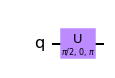

In [20]:
# let's have U-gate transform a |0> to |+> state
qc = QuantumCircuit(1)
qc.u(pi/2, 0, pi, 0)

qc.draw(output="mpl")

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


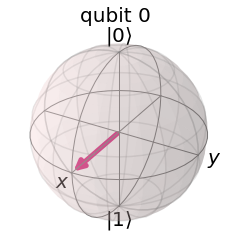

In [21]:
qc.save_statevector()

state = sim.run(qc).result().get_statevector()
plot_bloch_multivector(state)

It should be obvious from this that there are an infinite number of possible gates, and that this also includes $R_x$ and $R_y$-gates, although they are not mentioned here. It must also be noted that there is nothing special about the Z-basis, except that it has been selected as the standard computational basis. Qiskit also provides the $X$ equivalent of the $S$ and $S^\dagger$ i.e. the $SX$-gate and $SXdg$-gate respectively. These gates do a quarter-turn with respect to the $X$-axis around the Bloch sphere and are a special case of the $R_x$-gate.

Before running on real IBM quantum hardware, all single-qubit operations are compiled down to $I$, $X$, $SX$ and $R_z$. For this reason they are sometimes called the __physical gates__.